In [42]:
import plotly.graph_objects as go

def plot_cyclone_track(latitudes, longitudes):
    fig = go.Figure(go.Scattergeo(
        lon=longitudes,
        lat=latitudes,
        mode='lines',
        line=dict(width=2, color='red')
    ))

    # Set the figure size
    fig.update_layout(
        height=600,  # Height of the figure in pixels
        width=800    # Width of the figure in pixels
    )

    # Define the longitude and latitude ranges for eastern India
    lat_min, lat_max = 20, 30  # Latitude range
    lon_min, lon_max = 85, 92  # Longitude range

    # Scatter plot for cyclone points
    fig.add_trace(go.Scattergeo(
        lon=[91.5, 87.1],
        lat=[20.5, 23.2],
        mode='markers',
        marker=dict(size=10, color='blue')
    ))

    # Add major cities
    cities = {
        'Kolkata': {'lat': 22.5726, 'lon': 88.3639},
        'Bhubaneswar': {'lat': 20.2961, 'lon': 85.8245},
        'Bankura': {'lat': 23.2325, 'lon': 87.0694},
        'Haringhata': {'lat': 22.9, 'lon': 88.5},
        # Add more cities as needed
    }
    for city, coords in cities.items():
        fig.add_trace(go.Scattergeo(
            lon=[coords['lon']],
            lat=[coords['lat']],
            mode='markers',
            marker=dict(size=5, color='red'),
            name=city
        ))

    # Add state boundaries
    state_boundaries = go.Scattergeo(
        lon=[],
        lat=[],
        mode='lines',
        line=dict(width=2, color='black')
    )
    fig.add_trace(state_boundaries)

    # Update layout
    fig.update_geos(
        visible=False,  # Hide the entire world map
        projection_type="orthographic",  # Set projection type
        lonaxis_range=[lon_min, lon_max],  # Set longitude range
        lataxis_range=[lat_min, lat_max],  # Set latitude range
        showland=True,  # Show land masses
        showocean=True,  # Show ocean bodies
        showcountries=True,  # Show country boundaries
        countrycolor="gray",  # Set country boundary color
        coastlinecolor="gray",  # Set coastline color
        showcoastlines=True,  # Show coastline
        resolution=50  # Increase resolution for better boundary lines
    )

    fig.update_layout(
        margin=dict(l=0, r=0, t=0, b=0),  # Set margin to zero
        title=None,  # Remove title
        legend=dict(x=0, y=1)  # Position legend at top left
    )

    fig.show()

# Example data for latitude and longitude
latitudes = [10.0, 11.0, 12.0, 13.0]  # Replace with your actual latitude data
longitudes = [70.0, 71.0, 72.0, 73.0]  # Replace with your actual longitude data

# Plot the cyclone track
plot_cyclone_track(latitudes, longitudes)


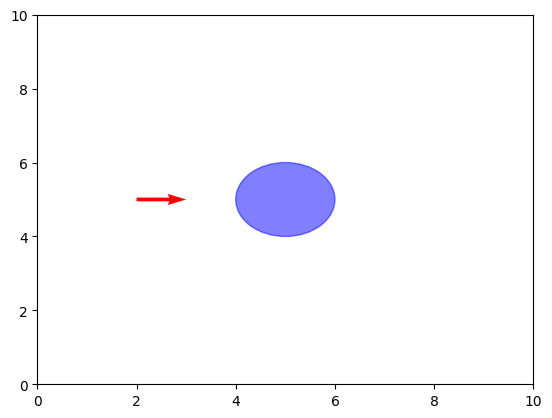

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Setup
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
cloud = plt.Circle((5, 5), 1, color='blue', alpha=0.5)
ax.add_artist(cloud)
wind_arrow = ax.quiver(2, 5, 1, 0, color='red', scale=10)

# Update function
def update(frame):
    # Simulate wind blowing towards the cloud
    wind_arrow.set_offsets((2 + frame * 0.1, 5))
    # Simulate gravity wave formation
    if frame > 20:
        wind_arrow.set_offsets((2 + frame * 0.1, 5 + np.sin((frame - 20) * 0.5)))
    return wind_arrow,

# Animate
ani = animation.FuncAnimation(fig, update, frames=40, blit=True)
plt.show()
